In [7]:
import os 
os.chdir('..')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from functions.stochastic_solver import solve_system, solve_system_srk, solve_system_seuler, solve_system_heun

In [9]:
# Define the parameters (langlen sss)
V0 = 2; V1 = 2; V4 = 5; kf = 1; k = 10; VM2 = 6; k2 = 0.1; VM3 = 20; m = 2; kx = 0.5; ky = 0.2; kz = 0.2; VM5 = 30; k5 = 3; kd = 0.5; p = 2; n = 4; 
V = 1000

In [10]:
# Define parameters
dt_values = [1e-5, 1e-4]
tmax = 10
#beta, epsilon = 0.43427226117873796,	2.785595527815474
beta, epsilon = 0.6587600166165364,	3.937412065733053 # SSS points

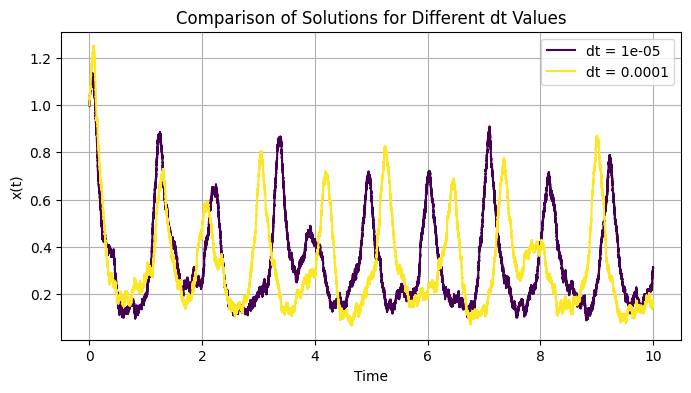

In [11]:
# Create a figure for plotting
plt.figure(figsize=(8, 4))

# Define a color map for different dt values
colors = plt.cm.viridis(np.linspace(0, 1, len(dt_values)))

# Solve the system and plot for each dt
for i, dt in enumerate(dt_values):
    x_t, y_t, z_t = solve_system_seuler(beta, epsilon, dt, tmax, V0, V1, VM2, k2, VM3, kx, ky, kz, VM5, k5, kd, V4, k, kf, m, n, p, V)
    t = np.linspace(0, tmax, len(x_t))
    plt.plot(t, x_t, color=colors[i], label=f'dt = {dt}')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Comparison of Solutions for Different dt Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()